In [1]:
import re
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
#dataframes to decode main tables
entidades=pd.read_csv('../Data/ENTIDADES.csv')
nacionalidad=pd.read_csv('../Data/NACIONALIDAD.csv')
paciente=pd.read_csv('../Data/PACIENTE.csv')
result_antig=pd.read_csv('../Data/RESULT_ANTIG.csv')
result_lab=pd.read_csv('../Data/RESULT_LAB.csv')
sector=pd.read_csv('../Data/SECTOR.csv')
sexo=pd.read_csv('../Data/SEXO.csv')
clasificacion_final=pd.read_csv('../Data/CLASIF_FINAL.csv')
si_no_pd=pd.read_csv('../Data/SI_NO.csv')


In [3]:
dataframes=[]
for i in range(1):
    
    datalocation=f'../Data/COVID202{i}.csv'
    dataframes.append(pd.read_csv(datalocation).drop({'FECHA_ACTUALIZACION',
                                                'ENTIDAD_NAC',
                                                'ENTIDAD_RES',
                                                'MUNICIPIO_RES',
                                                'ORIGEN',
                                                'NEUMONIA',
                                                'HABLA_LENGUA_INDIG',
                                                'OTRA_COM',
                                                'TABAQUISMO',
                                                'OTRO_CASO',
                                                'TOMA_MUESTRA_LAB',
                                                'TOMA_MUESTRA_ANTIGENO',
                                                'MIGRANTE',
                                                'PAIS_NACIONALIDAD'}
                                                ,axis=1))
    print(datalocation)


In [ ]:
dataframes[0].head()

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,...,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,PAIS_ORIGEN,UCI
0,z4d6fe,6,24,1,1,2020-12-06,2020-11-30,9999-99-99,97,55,...,2,2,2,2,2,1,97,3,97,97
1,z2a3cf,6,24,2,1,2020-02-20,2020-02-18,9999-99-99,97,59,...,2,2,2,2,2,97,97,6,97,97
2,z1e370,12,14,1,1,2020-04-22,2020-04-18,9999-99-99,97,42,...,2,2,2,2,2,2,97,7,97,97
3,z3bf80,12,8,2,1,2020-07-28,2020-07-20,9999-99-99,97,35,...,2,2,2,2,2,1,97,3,97,97
4,zz7067,12,9,2,1,2020-08-18,2020-08-17,9999-99-99,97,51,...,2,1,2,2,2,2,97,7,97,97


In [ ]:
complete_data=pd.DataFrame()
print(complete_data)

Empty DataFrame
Columns: []
Index: []


In [ ]:
for dataframe in dataframes:
    complete_data=pd.concat([complete_data,dataframe])

In [ ]:
#Reduce complete_data to 1000 rows
complete_data=complete_data.sample(1000)

In [ ]:
#Clean some columns data due to accents and ñ
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('á','a')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('é','e')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('í','i')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('ú','u')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('ó','u')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('ñ','n')

In [ ]:
complete_data

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,...,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,PAIS_ORIGEN,UCI
3555650,a2ef3a,12,19,2,1,2021-01-02,2020-12-25,9999-99-99,97,18,...,2,2,2,2,2,97,1,3,97,97
1374452,0ed48d,12,9,2,1,2020-08-24,2020-08-23,9999-99-99,97,45,...,2,2,2,2,2,2,97,7,97,97
2312508,3a0e45,4,25,1,1,2020-11-05,2020-11-03,9999-99-99,97,32,...,2,2,2,2,2,2,97,7,97,97
2627722,2be1f2,12,22,1,1,2020-11-26,2020-11-23,9999-99-99,97,56,...,2,2,2,2,2,1,97,3,97,97
1491207,08ab8d,12,9,2,1,2020-09-02,2020-09-02,9999-99-99,97,53,...,2,2,2,2,2,1,97,3,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645355,438ff0,12,5,1,1,2020-09-14,2020-09-10,9999-99-99,97,49,...,2,2,2,2,2,1,97,3,97,97
3454360,32268a,12,9,1,1,2020-12-29,2020-12-27,9999-99-99,97,59,...,2,2,2,2,2,97,1,3,97,97
3026321,35ea5e,4,1,1,1,2020-12-14,2020-12-12,9999-99-99,97,22,...,2,2,2,2,2,2,97,7,97,97
3156145,26da81,12,16,1,1,2020-12-19,2020-12-15,9999-99-99,97,50,...,2,2,2,2,2,1,97,3,97,97


In [ ]:
#REMOVE/RENAME COLUMNS BUT FIRST FILTER IMPORTANT INFORMATION

complete_data=complete_data.loc[complete_data['INDIGENA']==2]
complete_data=complete_data.drop({'INDIGENA'},axis=1)

complete_data=complete_data.rename(columns={'UCI':'CUIDADOS_INTENSIVOS'})

complete_data=complete_data.rename(columns={'FECHA_DEF':'FALLECIO'})
complete_data['FALLECIO']=complete_data.loc[complete_data['FALLECIO']!='9999-99-99']['FALLECIO'].str.replace(r'.+','SI',regex=True)
complete_data['FALLECIO']=complete_data['FALLECIO'].replace(np.nan,'NO',regex=True)


In [ ]:
complete_data

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FALLECIO,INTUBADO,EDAD,...,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,PAIS_ORIGEN,CUIDADOS_INTENSIVOS
3555650,a2ef3a,12,19,2,1,2021-01-02,2020-12-25,NO,97,18,...,2,2,2,2,2,97,1,3,97,97
2312508,3a0e45,4,25,1,1,2020-11-05,2020-11-03,NO,97,32,...,2,2,2,2,2,2,97,7,97,97
2627722,2be1f2,12,22,1,1,2020-11-26,2020-11-23,NO,97,56,...,2,2,2,2,2,1,97,3,97,97
1846785,327e9b,4,15,1,1,2020-10-01,2020-09-27,NO,97,21,...,2,2,2,2,2,2,97,7,97,97
1864702,208659,4,9,2,1,2020-10-03,2020-10-02,NO,97,24,...,2,2,2,2,2,2,97,7,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210690,2c26bf,4,17,1,1,2020-10-28,2020-10-26,NO,97,26,...,2,2,2,2,2,2,97,7,97,97
1645355,438ff0,12,5,1,1,2020-09-14,2020-09-10,NO,97,49,...,2,2,2,2,2,1,97,3,97,97
3026321,35ea5e,4,1,1,1,2020-12-14,2020-12-12,NO,97,22,...,2,2,2,2,2,2,97,7,97,97
3156145,26da81,12,16,1,1,2020-12-19,2020-12-15,NO,97,50,...,2,2,2,2,2,1,97,3,97,97


In [ ]:
#Replace data on complete_data with keys

complete_data2=complete_data.copy()

def replace_with_keyvalues(disease,key_dataframe,main_dataframe):
    key_dataframe=key_dataframe.rename(columns={'CLAVE':disease})
    main_dataframe=pd.DataFrame.merge(main_dataframe,key_dataframe,on=disease,how='inner')
    main_dataframe=main_dataframe.drop({disease},axis=1)
    main_dataframe=main_dataframe.rename(columns={'DESCRIPCION':disease})
    return main_dataframe

#catologue si_no replace data

complete_data2=replace_with_keyvalues('INTUBADO',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('EMBARAZO',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('DIABETES',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('EPOC',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('ASMA',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('INMUSUPR',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('HIPERTENSION',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('CARDIOVASCULAR',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('OBESIDAD',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('RENAL_CRONICA',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('CUIDADOS_INTENSIVOS',si_no_pd,complete_data2)

#catalogues replace data
complete_data2=replace_with_keyvalues('NACIONALIDAD',nacionalidad,complete_data2)
complete_data2=replace_with_keyvalues('TIPO_PACIENTE',paciente,complete_data2)
complete_data2=replace_with_keyvalues('SEXO',sexo,complete_data2)
complete_data2=replace_with_keyvalues('ENTIDAD_UM',entidades,complete_data2)
complete_data2=replace_with_keyvalues('SECTOR',sector,complete_data2)
complete_data2=replace_with_keyvalues('RESULTADO_LAB',result_lab,complete_data2)
complete_data2=replace_with_keyvalues('RESULTADO_ANTIGENO',result_antig,complete_data2)
complete_data2=replace_with_keyvalues('CLASIFICACION_FINAL',clasificacion_final,complete_data2)


#replace PAIS_ORIGEN 97 CODE with NO APLICA
complete_data2['PAIS_ORIGEN']=complete_data2['PAIS_ORIGEN'].replace('97','NO APLICA')


KeyError: 'INTUBADO'

In [ ]:
complete_data2.head()

,ID_REGISTRO,FECHA_INGRESO,FECHA_SINTOMAS,FALLECIO,EDAD,PAIS_ORIGEN,INTUBADO,EMBARAZO,DIABETES,EPOC,...,RENAL_CRONICA,CUIDADOS_INTENSIVOS,NACIONALIDAD,TIPO_PACIENTE,SEXO,ENTIDAD_UM,SECTOR,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL
0,a2ef3a,2021-01-02,2020-12-25,NO,18,NO APLICA,NO APLICA,NO APLICA,NO,NO,...,NO,NO APLICA,MEXICANA,AMBULATORIO,HOMBRE,NUEVO LEON,SSA,NO APLICA (CASO SIN MUESTRA),POSITIVO,CONFIRMADO
1,a19edc,2020-12-11,2020-12-06,NO,26,NO APLICA,NO APLICA,NO APLICA,NO,NO,...,NO,NO APLICA,MEXICANA,AMBULATORIO,HOMBRE,CIUDAD DE MEXICO,SSA,NO APLICA (CASO SIN MUESTRA),POSITIVO,CONFIRMADO
2,231dce,2020-12-21,2020-12-14,NO,56,NO APLICA,NO APLICA,NO APLICA,NO,NO,...,NO,NO APLICA,MEXICANA,AMBULATORIO,HOMBRE,CIUDAD DE MEXICO,SSA,NO APLICA (CASO SIN MUESTRA),POSITIVO,CONFIRMADO
3,2d1d4a,2020-12-24,2020-12-21,NO,16,NO APLICA,NO APLICA,NO APLICA,NO,NO,...,NO,NO APLICA,MEXICANA,AMBULATORIO,HOMBRE,CIUDAD DE MEXICO,SSA,NO APLICA (CASO SIN MUESTRA),POSITIVO,CONFIRMADO
4,5e3b7c,2021-01-09,2020-12-30,NO,15,NO APLICA,NO APLICA,NO APLICA,NO,NO,...,NO,NO APLICA,MEXICANA,AMBULATORIO,HOMBRE,CIUDAD DE MEXICO,SSA,NO APLICA (CASO SIN MUESTRA),POSITIVO,CONFIRMADO


In [ ]:
complete_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 936
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_REGISTRO          937 non-null    object
 1   FECHA_INGRESO        937 non-null    object
 2   FECHA_SINTOMAS       937 non-null    object
 3   FALLECIO             937 non-null    object
 4   EDAD                 937 non-null    int64 
 5   PAIS_ORIGEN          937 non-null    object
 6   INTUBADO             937 non-null    object
 7   EMBARAZO             937 non-null    object
 8   DIABETES             937 non-null    object
 9   EPOC                 937 non-null    object
 10  ASMA                 937 non-null    object
 11  INMUSUPR             937 non-null    object
 12  HIPERTENSION         937 non-null    object
 13  CARDIOVASCULAR       937 non-null    object
 14  OBESIDAD             937 non-null    object
 15  RENAL_CRONICA        937 non-null    object
 16  CUIDADOS

In [ ]:
complete_data2.to_csv('../Resultados/Dataframe.csv')

In [ ]:
sexo_pd=complete_data2.groupby(['SEXO','FALLECIO'])
sexo_pd.describe()['EDAD']['count']

SEXO    FALLECIO
HOMBRE  NO          441.0
        SI           34.0
MUJER   NO          446.0
        SI           16.0
Name: count, dtype: float64

In [ ]:
#define function to calculate P value and graph

def graphvalues (parametro,complete_data2,angle):
    #define values to be dropped
    values = ['NO APLICA','NO ESPECIFICADO','SE IGNORA','NO APLICA (CASO SIN MUESTRA)','RESULTADO NO ADECUADO ']
    parametro_pd=complete_data2.copy()
    #drop rows that contain any value in the list
    parametro_pd = parametro_pd[parametro_pd[parametro].isin(values) == False]

    crosstab_parametro=pd.crosstab(index=parametro_pd[parametro],columns=parametro_pd['FALLECIO'])
    chisqresult = chi2_contingency(crosstab_parametro)

    print(crosstab_parametro)
    print(f'P value = {chisqresult[1]}')

    if chisqresult[1]>0.05:
        print(f'The variables are NOT correlated, Pvalue>0.05 ,we accept H0')
    else:
        print(f'The variables ARE correlated, Pvalue<0.05 ,we reject H0')
    
    parametrograph=crosstab_parametro.plot.bar(rot=0)
    plt.xticks(rotation=angle)
    plt.savefig(f'../Resultados/{parametro}.png')
    return parametrograph
  



FALLECIO   NO  SI
SEXO             
HOMBRE    441  34
MUJER     446  16
P value = 0.0177692467117431
The variables ARE correlated, Pvalue<0.05 ,we reject H0


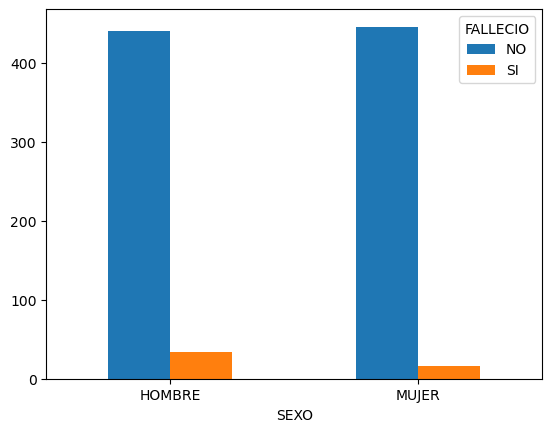

In [ ]:
#Correlation between FALLECIO vs SEXO
graphvalues('SEXO',complete_data2,0)
plt.show()

FALLECIO            NO  SI
RANGO DE EDAD             
<30                266   0
Between 31 and 50  384  11
Between 51 and 70  197  28
71 and more         40  11
P value = 6.354250030339178e-15
The variables ARE correlated, Pvalue<0.05 ,we reject H0


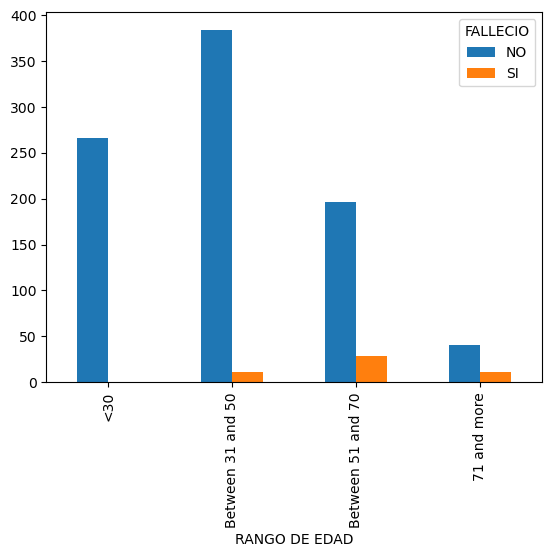

In [ ]:
#Correlation between FALLECIO vs EDAD
complete_data3=complete_data2.copy()
#Split data considering the pacients age range
ages=[0,30,50,70,120]
age_ranges=["<30","Between 31 and 50","Between 51 and 70","71 and more"]
# Slice the data and place it into bins
complete_data3["RANGO DE EDAD"] = pd.cut(complete_data3["EDAD"],
                                              ages, labels=age_ranges,
                                              include_lowest=True)

graphvalues('RANGO DE EDAD',complete_data3,90)
plt.show()

FALLECIO  NO  SI
INTUBADO        
NO        68  27
SI         4  20
P value = 2.823331620254764e-06
The variables ARE correlated, Pvalue<0.05 ,we reject H0


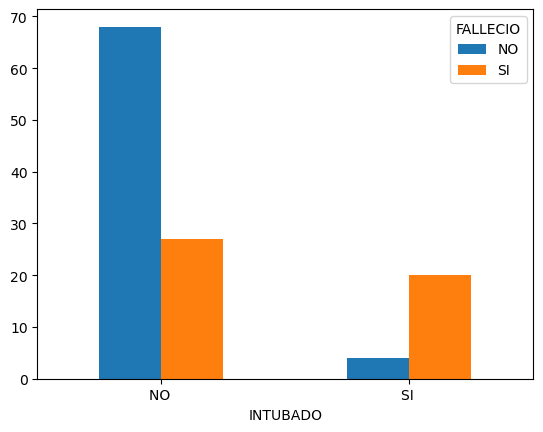

In [ ]:
#Correlation between FALLECIO vs INTUBADO
graphvalues('INTUBADO',complete_data2,0)
plt.show()

FALLECIO   NO  SI
EMBARAZO         
NO        436  16
SI          9   0
P value = 1.0
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


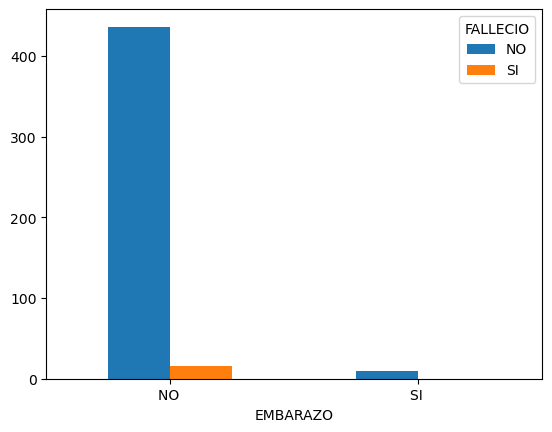

In [ ]:
#Correlation between FALLECIO vs EMBARAZO
graphvalues('EMBARAZO',complete_data2,0)
plt.show()

FALLECIO   NO  SI
DIABETES         
NO        805  26
SI         77  23
P value = 3.070782164171985e-16
The variables ARE correlated, Pvalue<0.05 ,we reject H0


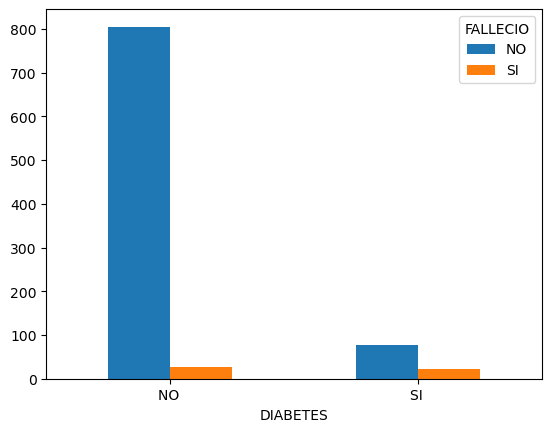

In [ ]:
#Correlation between FALLECIO vs DIABETES
graphvalues('DIABETES',complete_data2,0)
plt.show()

FALLECIO   NO  SI
EPOC             
NO        877  47
SI          7   2
P value = 0.12292941095602528
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


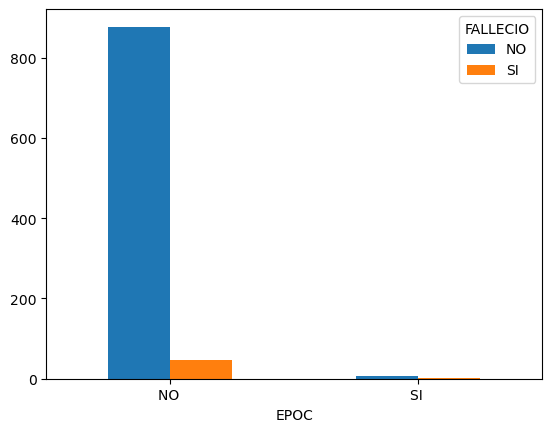

In [ ]:
#Correlation between FALLECIO vs EPOC
graphvalues('EPOC',complete_data2,0)
plt.show()

FALLECIO   NO  SI
ASMA             
NO        852  49
SI         32   0
P value = 0.3410671681879178
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


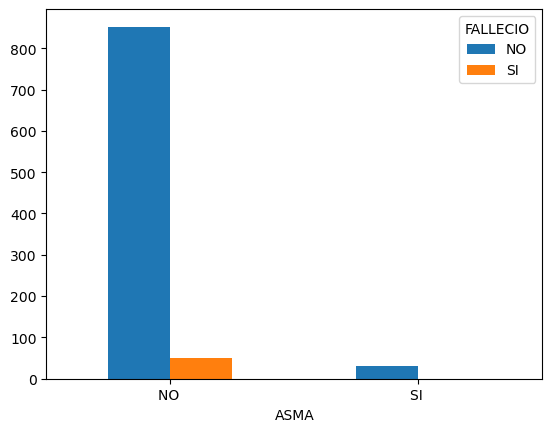

In [ ]:
#Correlation between FALLECIO vs ASMA
graphvalues('ASMA',complete_data2,0)
plt.show()

FALLECIO   NO  SI
INMUSUPR         
NO        871  48
SI         11   1
P value = 1.0
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


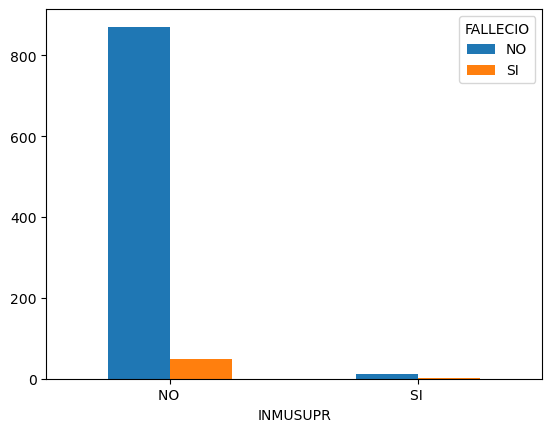

In [ ]:
#Correlation between FALLECIO vs INMUSUPR
graphvalues('INMUSUPR',complete_data2,0)
plt.show()

FALLECIO       NO  SI
HIPERTENSION         
NO            770  24
SI            114  25
P value = 1.3474392282818808e-12
The variables ARE correlated, Pvalue<0.05 ,we reject H0


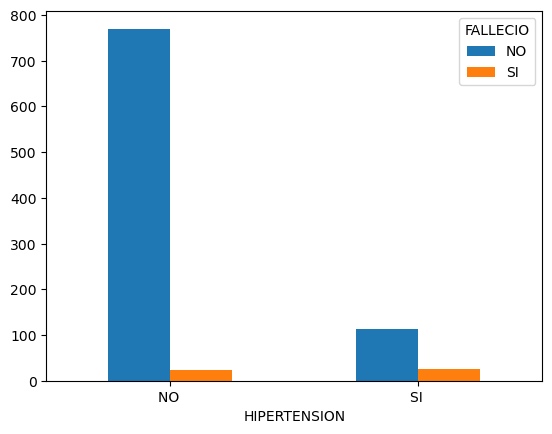

In [ ]:
#Correlation between FALLECIO vs HIPERTENSION
graphvalues('HIPERTENSION',complete_data2,0)
plt.show()

FALLECIO         NO  SI
CARDIOVASCULAR         
NO              873  44
SI               10   5
P value = 1.5004407624363651e-05
The variables ARE correlated, Pvalue<0.05 ,we reject H0


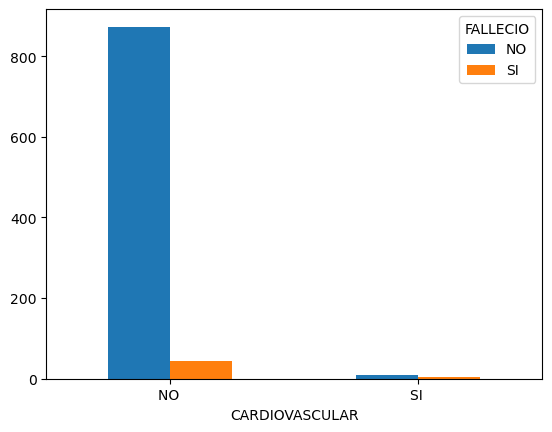

In [ ]:
#Correlation between FALLECIO vs CARDIOVASCULAR
graphvalues('CARDIOVASCULAR',complete_data2,0)
plt.show()

FALLECIO   NO  SI
OBESIDAD         
NO        790  35
SI         94  14
P value = 0.00032948035523154193
The variables ARE correlated, Pvalue<0.05 ,we reject H0


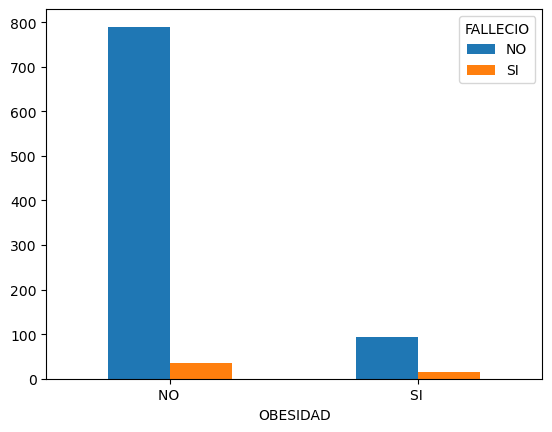

In [ ]:
#Correlation between FALLECIO vs OBESIDAD
graphvalues('OBESIDAD',complete_data2,0)
plt.show()

FALLECIO        NO  SI
RENAL_CRONICA         
NO             871  40
SI              12   9
P value = 2.588486373948543e-13
The variables ARE correlated, Pvalue<0.05 ,we reject H0


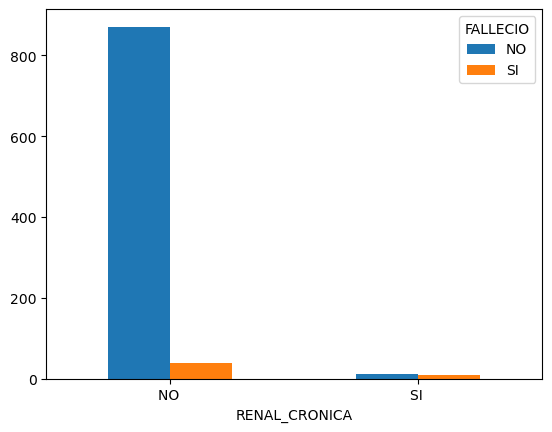

In [ ]:
#Correlation between FALLECIO vs RENAL_CRONICA
graphvalues('RENAL_CRONICA',complete_data2,0)
plt.show()

FALLECIO             NO  SI
CUIDADOS_INTENSIVOS        
NO                   67  42
SI                    5   5
P value = 0.709865160557424
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


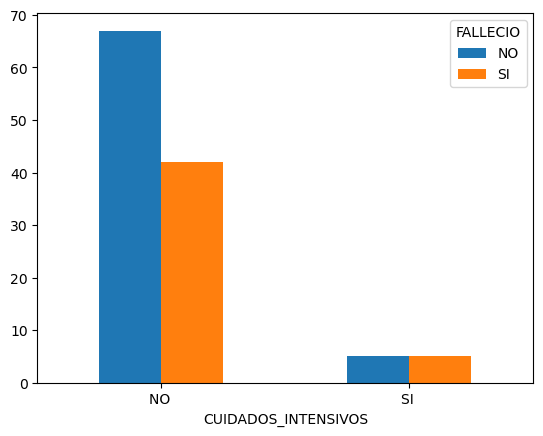

In [ ]:
#Correlation between FALLECIO vs CUIDADOS_INTENSIVOS
graphvalues('CUIDADOS_INTENSIVOS',complete_data2,0)
plt.show()

FALLECIO       NO  SI
NACIONALIDAD         
EXTRANJERA      5   0
MEXICANA      882  50
P value = 1.0
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


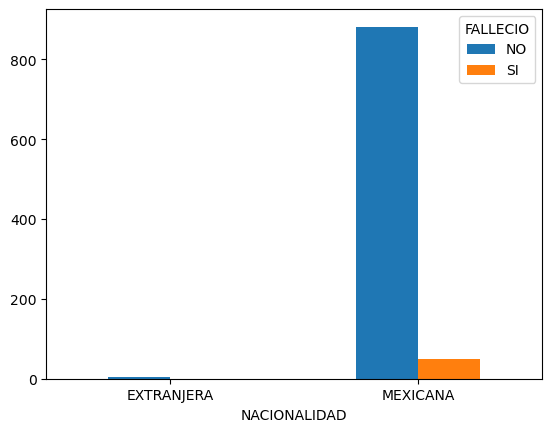

In [ ]:
#Correlation between FALLECIO vs NACIONALIDAD
graphvalues('NACIONALIDAD',complete_data2,0)
plt.show()

FALLECIO        NO  SI
TIPO_PACIENTE         
AMBULATORIO    814   2
HOSPITALIZADO   73  48
P value = 8.507984910288564e-71
The variables ARE correlated, Pvalue<0.05 ,we reject H0


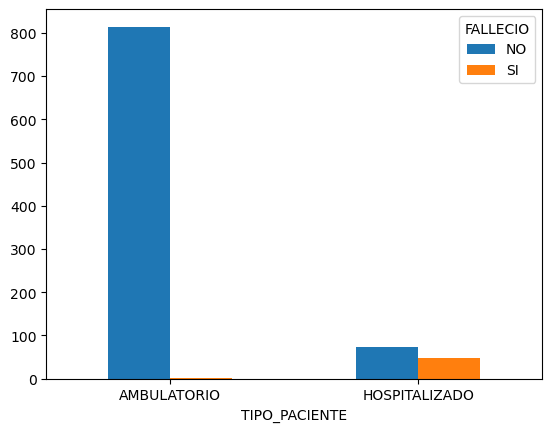

In [ ]:
#Correlation between FALLECIO vs TIPO_PACIENTE
graphvalues('TIPO_PACIENTE',complete_data2,0)
plt.show()

FALLECIO                          NO  SI
ENTIDAD_UM                              
AGUASCALIENTES                    14   0
BAJA CALIFORNIA                   16   1
BAJA CALIFORNIA SUR               13   1
CAMPECHE                           1   0
CHIAPAS                           21   0
CHIHUAHUA                         17   3
CIUDAD DE MEXICO                 300  11
COAHUILA DE ZARAGOZA              19   1
COLIMA                             2   0
DURANGO                           18   1
GUANAJUATO                        57   3
GUERRERO                          14   1
HIDALGO                            8   0
JALISCO                           29   3
MEXICO                            49   5
MICHOACAN DE OCAMPO               20   2
MORELOS                            6   0
NAYARIT                            7   1
NUEVO LEON                        48   2
OAXACA                             7   1
PUEBLA                            26   0
QUERETARO                         18   1
QUINTANA ROO    

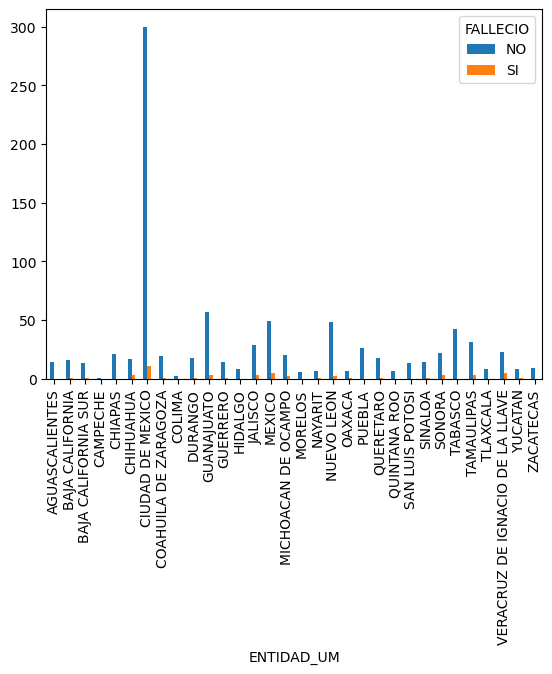

In [ ]:
#Correlation between FALLECIO vs ENTIDAD_UM
graphvalues('ENTIDAD_UM',complete_data2,90)
plt.show()

FALLECIO         NO  SI
SECTOR                 
ESTATAL          10   1
IMSS            205  31
IMSS-BIENESTAR    4   0
ISSSTE           25   4
PEMEX            10   0
PRIVADA          25   0
SEDENA            5   2
SEMAR             7   0
SSA             596  12
P value = 2.238284351821967e-09
The variables ARE correlated, Pvalue<0.05 ,we reject H0


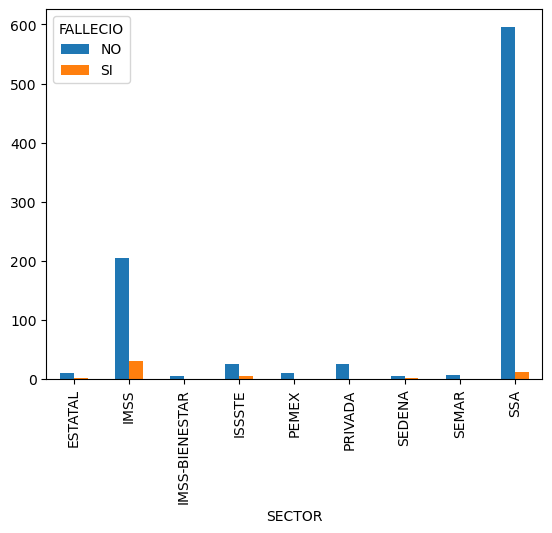

In [ ]:
#Correlation between FALLECIO vs SECTOR
graphvalues('SECTOR',complete_data2,90)
plt.show()

FALLECIO        NO  SI
RESULTADO_LAB         
NEGATIVO       382   7
POSITIVO       303  37
P value = 6.313911991307073e-07
The variables ARE correlated, Pvalue<0.05 ,we reject H0


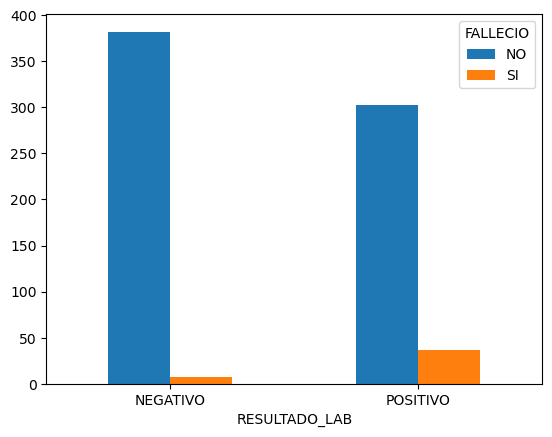

In [ ]:
#Correlation between FALLECIO vs RESULTADO_LAB
graphvalues('RESULTADO_LAB',complete_data2,0)
plt.show()

FALLECIO            NO  SI
RESULTADO_ANTIGENO        
NEGATIVO            86   1
POSITIVO            31   0
P value = 1.0
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


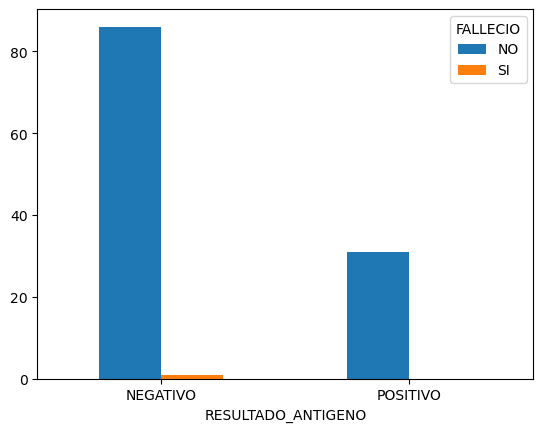

In [ ]:
#Correlation between FALLECIO vs RESULTADO_ANTIGENO
graphvalues('RESULTADO_ANTIGENO',complete_data2,0)
plt.show()

FALLECIO                       NO  SI
CLASIFICACION_FINAL                  
CASO SOSPECHOSO                64   0
CONFIRMADO                    334  37
CONFIRMADO POR ASOCIACION      14   2
CONFIRMADO POR COMITE           0   3
INVALIDO POR LABORATORIO        4   0
NEGATIVO                      458   7
NO REALIZADO POR LABORATORIO   13   1
P value = 7.626856939526757e-17
The variables ARE correlated, Pvalue<0.05 ,we reject H0


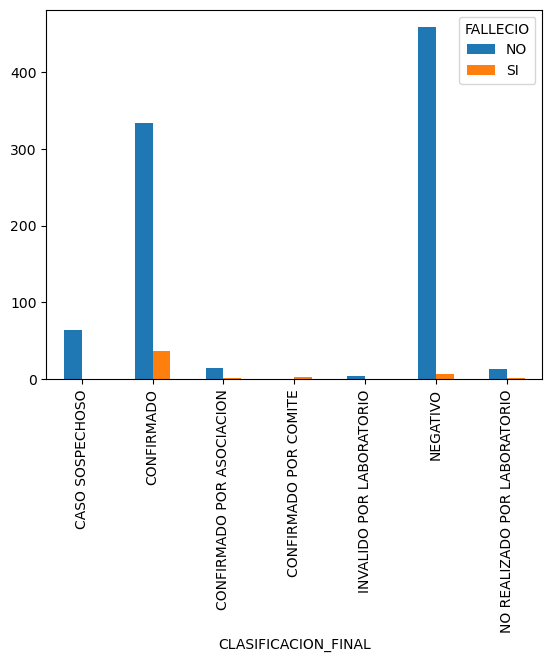

In [ ]:
#Correlation between FALLECIO vs CLASIFICACION_FINAL
graphvalues('CLASIFICACION_FINAL',complete_data2,90)
plt.show()